In [452]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from boruta import BorutaPy
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns 
from sklearn.impute import KNNImputer

In [454]:
wine_data = pd.read_csv('anaconda_projects/Python-ile-Yapay-Zekaya-Giris-Egitimi/Gün 3/vinedataset/wine.data')
wine_data

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6      127.0   
1        1    13.20        1.78  2.14               11.2      100.0   
2        1    13.16        2.36  2.67               18.6      101.0   
3        1    14.37        1.95  2.50               16.8      113.0   
4        1    13.24        2.59  2.87               21.0      118.0   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5       95.0   
174      3    13.40        3.91  2.48               23.0      102.0   
175      3    13.27        4.28  2.26               20.0      120.0   
176      3    13.17        2.59  2.37               20.0      120.0   
177      3    14.13        4.10  2.74               24.5       96.0   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.35             9.20   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92   1065.0  
1               4.38  1.05                          3.40   1050.0  
2               5.68  1.03                          3.17   1185.0  
3               7.80  0.86                          3.45   1480.0  
4               4.32  1.04                          2.93    735.0  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74    740.0  
174             7.30  0.70                          1.56    750.0  
175            10.20  0.59                          1.56    835.0  
176             9.30  0.60                          1.62    840.0  
177             0.61  1.60                        560.00      NaN  

[178 rows x 14 columns]

In [456]:
for key in wine_data.columns[1:]:
    Q1 = wine_data[key].quantile(0.25)
    Q3 = wine_data[key].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR
    alt_sinir
    wine_data.loc[(wine_data[key] >= alt_sinir) & (wine_data[key] >= ust_sinir), key] = None
    #print("column  {}, alt_sinir: {}, ust_sinir: {}".format(key,alt_sinir,ust_sinir)) 

In [458]:
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
df_impute = pd.DataFrame(imputer.fit_transform(wine_data), columns=wine_data.columns)

In [460]:
df_impute

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1.0    14.23        1.71  2.43               15.6      127.0   
1      1.0    13.20        1.78  2.14               11.2      100.0   
2      1.0    13.16        2.36  2.67               18.6      101.0   
3      1.0    14.37        1.95  2.50               16.8      113.0   
4      1.0    13.24        2.59  2.87               21.0      118.0   
..     ...      ...         ...   ...                ...        ...   
173    3.0    13.71        3.00  2.45               20.5       95.0   
174    3.0    13.40        3.91  2.48               23.0      102.0   
175    3.0    13.27        4.28  2.26               20.0      120.0   
176    3.0    13.17        2.59  2.37               20.0      120.0   
177    3.0    14.13        4.10  2.74               24.5       96.0   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.35             1.45   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                      3.920000   1065.0  
1               4.38  1.05                      3.400000   1050.0  
2               5.68  1.03                      3.170000   1185.0  
3               7.80  0.86                      3.450000   1480.0  
4               4.32  1.04                      2.930000    735.0  
..               ...   ...                           ...      ...  
173             7.70  0.64                      1.740000    740.0  
174             7.30  0.70                      1.560000    750.0  
175            10.20  0.59                      1.560000    835.0  
176             9.30  0.60                      1.620000    840.0  
177             0.61  1.60                      1.903333    565.0  

[178 rows x 14 columns]

In [462]:
data = df_impute.drop('Class', axis=1)
target = df_impute['Class']


In [464]:
scaler = StandardScaler()
normalized = scaler.fit_transform(data)
normalized

array([[ 1.51861254, -0.56972468,  0.28720497, ...,  0.32383561,
         1.84997717,  1.00899857],
       [ 0.24628963, -0.50143226, -0.83935435, ...,  0.36765706,
         1.1093355 ,  0.96116458],
       [ 0.19687903,  0.06441923,  1.21952993, ...,  0.28001415,
         0.78174398,  1.39167047],
       ...,
       [ 0.33275817,  1.93758278, -0.37319187, ..., -1.64812973,
        -1.5113966 ,  0.27554408],
       [ 0.20923168,  0.28880861,  0.05412373, ..., -1.60430828,
        -1.42593794,  0.29148874],
       [ 1.39508604,  1.7619737 ,  1.49145804, ...,  2.77783691,
        -1.02238318, -0.58546771]])

In [466]:
normalized_dataset = pd.DataFrame(normalized, columns=df_impute.columns[1:])
normalized_dataset.insert(0, 'Class', df_impute['Class'], allow_duplicates=True)

In [468]:
# Feature seçimi
target = normalized_dataset['Class']
data = normalized_dataset.drop('Class', axis=1)


In [470]:
x_train, x_test, y_train,y_test = train_test_split(data, target, test_size=0.3, random_state=42)


In [472]:
model = SVC(kernel='linear', random_state=42)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [474]:
y_pred = model.predict(x_test)

In [476]:
accuracy = accuracy_score(y_test,y_pred)

In [478]:
print(f"Simple Accuracy : {accuracy:.4f}")

Simple Accuracy : 0.9815


In [480]:
corss_scores = cross_val_score(model, data, target, cv=5)
print("Cross validation scores for each fold: {}".format(corss_scores)) 
print("Mean cross validation score : {}".format(corss_scores.mean()))

Cross validation scores for each fold: [0.94444444 0.94444444 0.91666667 0.94285714 0.94285714]
Mean cross validation score : 0.9382539682539683


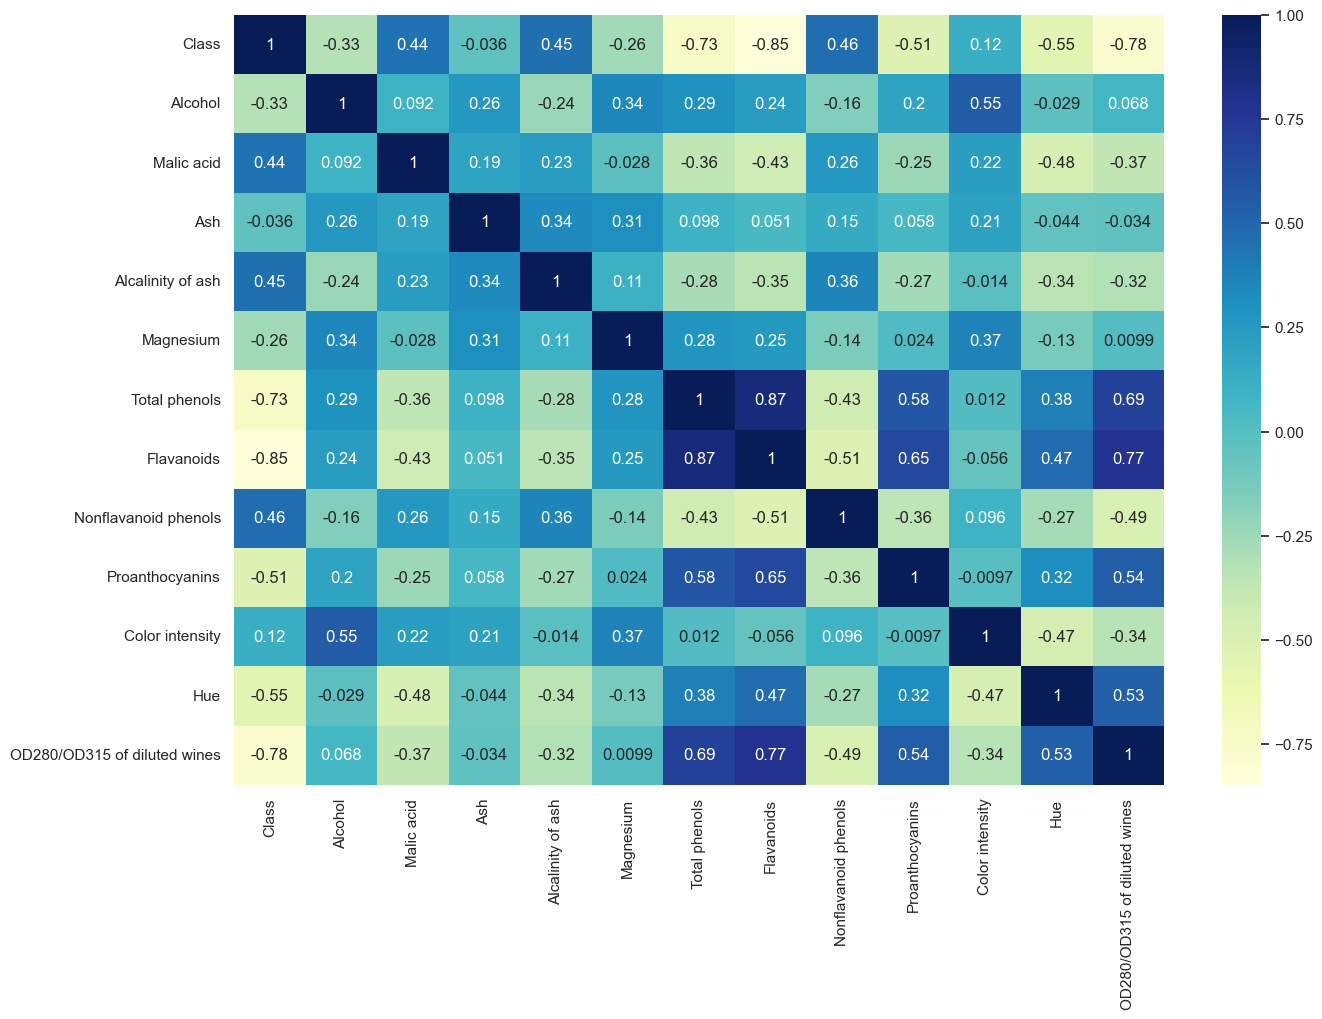

In [495]:
sns.set(rc={"figure.figsize":(15,10)})
sns.heatmap(normalized_dataset.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [484]:
#data = normalized_dataset.drop('Flavanoids', axis=1)
data = normalized_dataset.drop('OD280/OD315 of diluted wines', axis=1)


In [486]:
data

Class   Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0      1.0  1.518613   -0.569725  0.287205          -1.064889   2.023636   
1      1.0  0.246290   -0.501432 -0.839354          -2.352356   0.124242   
2      1.0  0.196879    0.064419  1.219530          -0.187071   0.194590   
3      1.0  1.691550   -0.335579  0.559133          -0.713762   1.038765   
4      1.0  0.295700    0.288809  1.996467           0.515184   1.390505   
..     ...       ...         ...       ...                ...        ...   
173    3.0  0.876275    0.688807  0.364899           0.368881  -0.227498   
174    3.0  0.493343    1.576609  0.481439           1.100396   0.264938   
175    3.0  0.332758    1.937583 -0.373192           0.222578   1.531200   
176    3.0  0.209232    0.288809  0.054124           0.222578   1.531200   
177    3.0  1.395086    1.761974  1.491458           1.539306  -0.157150   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0         0.810503    1.033952             -0.643044         1.320728   
1         0.573348    0.733701             -0.805478        -0.549275   
2         0.810503    1.214102             -0.480610         2.283501   
3         2.470591    1.464310             -0.967912         1.117064   
4         0.810503    0.663643              0.250343         0.450529   
..             ...         ...                   ...              ...   
173      -0.960257   -1.418092              1.306164        -0.956602   
174      -0.770533   -1.277975              0.575211        -0.308581   
175      -1.102551   -1.338025              0.575211        -0.419671   
176      -1.007688   -1.348034              1.387381        -0.216007   
177      -0.375274   -1.267967             -0.074525        -0.234522   

     Color intensity       Hue   Proline  
0           0.407217  0.323836  1.008999  
1          -0.200304  0.367657  0.961165  
2           0.426504  0.280014  1.391670  
3           1.448682 -0.464951  2.332406  
4          -0.229234  0.323836 -0.043349  
..               ...       ...       ...  
173         1.400466 -1.429022 -0.027405  
174         1.207603 -1.166094  0.004485  
175         2.605866 -1.648130  0.275544  
176         2.171922 -1.604308  0.291489  
177        -2.018046  2.777837 -0.585468  

[178 rows x 13 columns]

In [488]:
x_train, x_test, y_train,y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [490]:
model = SVC(kernel='linear', random_state=42)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [497]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Simple Accuracy : {accuracy:.4f}")
corss_scores = cross_val_score(model, data, target, cv=5)
print("Cross validation scores for each fold: {}".format(corss_scores)) 
print("Mean cross validation score : {}".format(corss_scores.mean()))

Simple Accuracy : 1.0000
Mean cross validation score : 0.9774603174603176
